In [1]:
# import panada
# read csv and add header Label and SMS Message

In [2]:
import pandas as pd
sms_raw = pd.read_csv('SMSSpamCollection', sep='\t', header=None)
sms_raw

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
import pandas as pd

sms_spam = pd.read_csv('SMSSpamCollection', sep='\t',
header=None, names=['Label', 'SMS'])

sms_spam

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [7]:
import scikitplot as skplt

In [8]:
# Compare Algorithm
X = sms_spam['SMS']
y = sms_spam['Label']

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [10]:
#function for the model building and prediction
def Compare(model, X, y):
#training and testing the data
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
    # model building using CountVectorizer and TfidfTransformer
    our_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    our_model.fit(x_train, y_train)
    
    y_pred = our_model.predict(x_test)

    print("Classification Report is:\n",classification_report(y_test, y_pred))
    print('Accuracy:', our_model.score(x_test, y_test)*100)

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
Compare(model, X, y)

Classification Report is:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       979
        spam       1.00      0.80      0.89       136

    accuracy                           0.98      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Accuracy: 97.57847533632287


In [12]:
# Decision Tree Classifier
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
Compare(tree_clf,X,y)

Classification Report is:
               precision    recall  f1-score   support

         ham       0.96      0.98      0.97       979
        spam       0.83      0.72      0.77       136

    accuracy                           0.95      1115
   macro avg       0.90      0.85      0.87      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 94.79820627802691


In [13]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
Compare(model, X, y)

Classification Report is:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       979
        spam       1.00      0.82      0.90       136

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 97.847533632287


In [14]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


In [15]:
# Check ham and spam percentage in training set
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [16]:
# Check ham and spam percentage in test set
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

In [17]:
training_set.head(5)

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired
3,ham,Havent.
4,ham,I forgot 2 ask ü all smth.. There's a card on ...


In [18]:
# Remove punctuation
training_set['SMS'] = training_set['SMS'].str.replace('\W', ' ')
training_set.head(5)

,Label,SMS
0,ham,Yep by the pretty sculpture
1,ham,Yes princess Are you going to make me moan
2,ham,Welp apparently he retired
3,ham,Havent
4,ham,I forgot 2 ask ü all smth There s a card on ...


In [19]:
# Change string to lowercase
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head(5)

,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired
3,ham,havent
4,ham,i forgot 2 ask ü all smth there s a card on ...


In [20]:
# transform each message in the SMS into a word list
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
   for word in sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

In [21]:
# number of unique words in this list
len(vocabulary)

7783

In [22]:
print(vocabulary)

['vry', 'form', 'fixedline', 'greet', 'havin', 'noline', '09056242159', '09050001808', 'strips', 'anything', 'peeps', 'uks', 'fatty', '0844', 'january', 'ashes', 'adi', 'mobileupd8', 'within', 'seventeen', 'link', 'poly3', 'bstfrnd', 'blanked', 'bambling', 'lap', 'sf', 'resolution', 'pints', 'html', 'aburo', 'boss', 'distract', 'grownup', 'sun0819', 'save', 'early', 'weigh', 'sam', 'see', 'yorge', 'hillsborough', 'jetton', 'leafcutter', 'being', 'norm150p', 'cruise', 'uncle', 'reverse', 'info', 'school', 'marry', 'dependable', 'contains', 'chances', 'psp', 'inr', 'msgrcvd18', 'coffee', 'th', 'breath', 'present', 'odi', 'cheating', '08712402578', '177', 'fri', 'pobox365o4w45wq', 'relatives', 'interflora', 'continued', 'weakness', 'hostel', 'unspoken', 'chatter', 'tiime', 'global', 'teaches', '140ppm', 'treasure', 'erotic', 'lion', 'net', 'cricket', 'jogging', 'girlfrnd', '09058099801', 'fo', '2morrowxxxx', '09061743386', 'impede', 'invnted', 'flaky', 'happening', 'maruti', 'care', 'john

In [23]:
# change to new word table
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}

for index, sms in enumerate(training_set['SMS']):
   for word in sms:
      word_counts_per_sms[word][index] += 1

In [24]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,vry,form,fixedline,greet,havin,noline,09056242159,09050001808,strips,anything,...,paper,6pm,ji,toothpaste,inform,lotr,sweetie,icky,occasion,mack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Add label and SMS back to new word table
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head(5)

,Label,SMS,vry,form,fixedline,greet,havin,noline,09056242159,09050001808,...,paper,6pm,ji,toothpaste,inform,lotr,sweetie,icky,occasion,mack
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Classify ham and spam

In [27]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_words_per_spam_message = spam_messages['SMS'].apply(len)
n_spam = n_words_per_spam_message.sum()

# N_Ham
n_words_per_ham_message = ham_messages['SMS'].apply(len)
n_ham = n_words_per_ham_message.sum()

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

In [28]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

In [29]:
import re

In [30]:
def classify(message):

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham: 
         p_ham_given_message *= parameters_ham[word]

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message >= p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')

In [31]:
classify('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 1.3481290211300841e-25
P(Ham|message): 1.9368049028589875e-27
Label: Spam


In [32]:
classify("Sounds good, Tom, then see u there")

P(Spam|message): 2.4372375665888117e-25
P(Ham|message): 3.687530435009238e-21
Label: Ham


In [33]:
classify("free")

P(Spam|message): 0.0010311127129811642
P(Ham|message): 0.000652185702877218
Label: Spam


In [34]:
classify("txt")

P(Spam|message): 0.0007733345347358732
P(Ham|message): 0.00015971894764340032
Label: Spam


In [35]:
def classify_test_set(message):
    message = re.sub('\W', ' ', message)
    message = message.lower().split()

    p_spam_given_message = p_spam
    p_ham_given_message = p_ham

    for word in message:
        if word in parameters_spam:
            p_spam_given_message *= parameters_spam[word]

        if word in parameters_ham:
            p_ham_given_message *= parameters_ham[word]

    if p_ham_given_message >= p_spam_given_message:
        return 'ham'
    elif p_spam_given_message > p_ham_given_message:
        return 'spam'

test_set['predicted'] = test_set['SMS'].apply(classify_test_set)

correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
    row = row[1]
    if row['Label'] == row['predicted']:
        correct += 1

In [36]:
print('Total:', total)
print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct / total)

Total: 1114
Correct: 1101
Incorrect: 13
Accuracy: 0.9883303411131059


In [37]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt

In [38]:
sms_spam

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [39]:
# add a column represent the length of the text
len_text=[]
for i in sms_spam['SMS']:
    len_text.append(len(i))

In [40]:
sms_spam_textlength = sms_spam

In [41]:
sms_spam_textlength['text_length']=len_text

In [42]:
sms_spam_textlength

,Label,SMS,text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


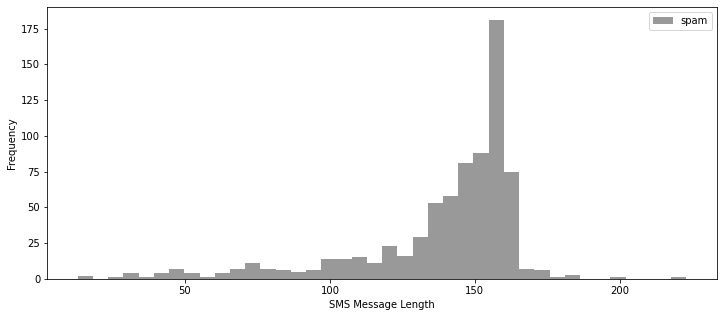

In [43]:
# Spam Message Length
plt.figure(figsize=(12,5))
sms_spam_textlength[sms_spam_textlength['Label']=='spam']['text_length'].plot(bins=40,kind='hist',color='grey',label='spam',alpha=0.8)
plt.legend()
plt.xlabel('SMS Message Length')
plt.show()

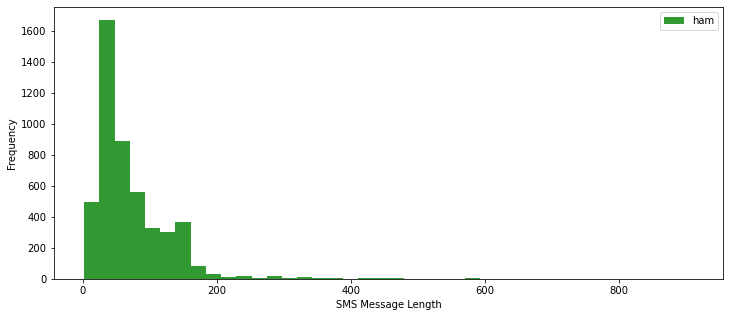

In [44]:
# Ham Messege Length
plt.figure(figsize=(12,5))
sms_spam_textlength[sms_spam_textlength['Label']=='ham']['text_length'].plot(bins=40,kind='hist',color='green',label='ham',alpha=0.8)
plt.legend()
plt.xlabel('SMS Message Length')
plt.show()

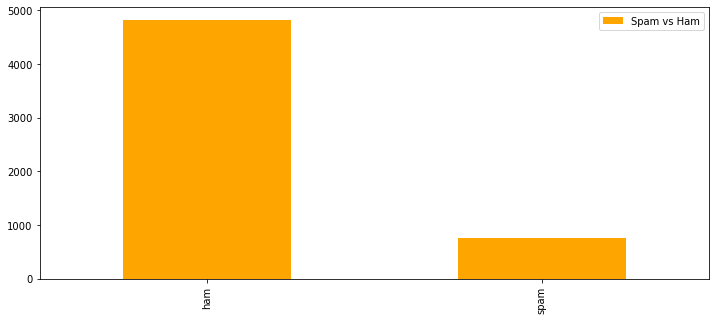

In [45]:

plt.figure(figsize=(12,5))
sms_spam_textlength['Label'].value_counts().plot(kind='bar',color='orange',label='Spam vs Ham')
plt.legend()
plt.show()

In [46]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [47]:
sms_spam_textlength['Label']=np.where(sms_spam_textlength['Label']=='spam',1,0)

In [48]:
spam=[]
ham=[]
spam_class=sms_spam_textlength[sms_spam_textlength['Label']==1]['SMS']
ham_class=sms_spam_textlength[sms_spam_textlength['Label']==0]['SMS']

In [49]:
def extract_ham(ham_class):
    global ham
    words = [word.lower() for word in word_tokenize(ham_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham=ham+words

In [50]:
def extract_spam(spam_class):
    global spam
    words = [word.lower() for word in word_tokenize(spam_class) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam=spam+words

In [51]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lok87\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
spam_class.apply(extract_spam)
ham_class.apply(extract_ham )

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: SMS, Length: 4825, dtype: object

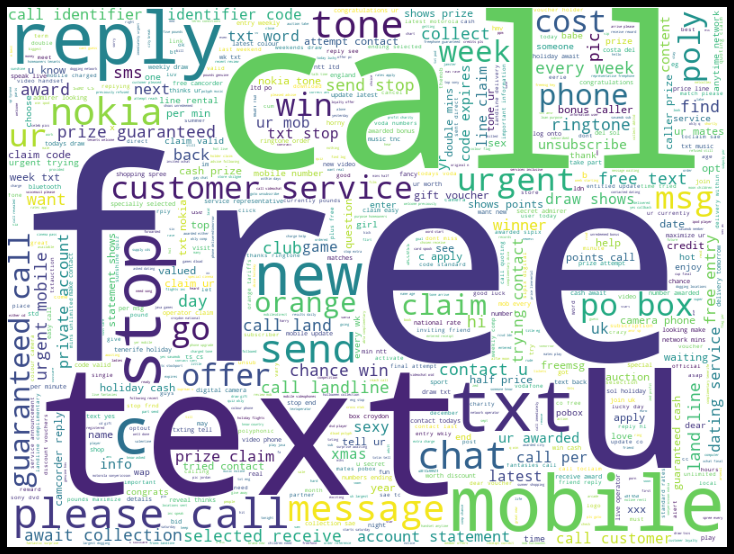

In [54]:
from wordcloud import WordCloud
from os import path
from PIL import Image
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
spam_wordcloud = WordCloud(background_color="white", max_words=2000, width=800, height=600).generate(" ".join(spam))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

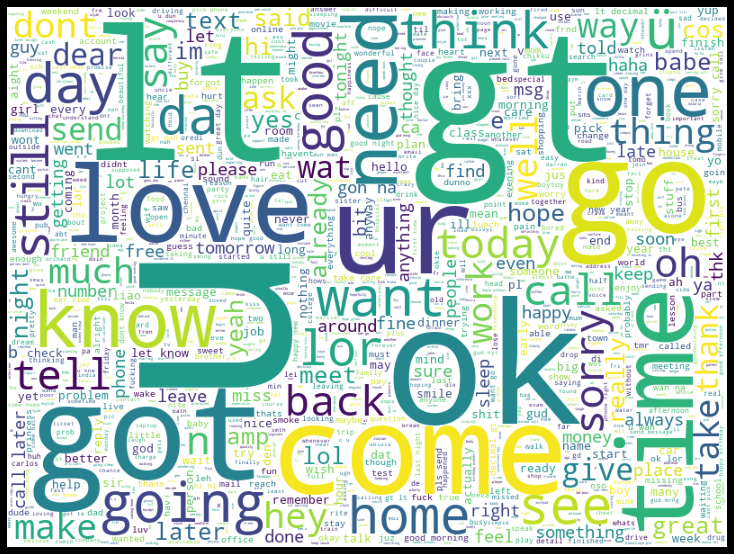

In [55]:
ham_wordcloud=WordCloud(background_color="white", max_words=2000, width=800, height=600).generate(" ".join(ham))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [59]:
spam_words=np.array(spam)
pd.Series(spam_words).value_counts().head(n=30)

call          346
free          219
txt           156
u             145
ur            144
mobile        123
text          121
stop          118
claim         113
reply         104
prize          92
get            84
new            69
send           69
nokia          65
urgent         63
cash           62
win            60
contact        56
service        55
please         54
week           53
c              51
guaranteed     50
customer       49
tone           48
per            46
phone          45
chat           43
cs             41
dtype: int64

In [60]:
ham_words=np.array(ham)
pd.Series(ham_words).value_counts().head(n=30)

u        1006
gt        318
lt        316
get       302
ok        257
go        251
ur        247
got       245
know      237
like      233
call      232
good      231
come      230
time      198
love      197
day       191
ü         173
going     169
one       168
want      164
lor       162
home      161
sorry     156
need      156
still     149
da        149
n         142
see       140
later     135
dont      133
dtype: int64